Code for Feature deletion and Insertion experiment on Binary datasets.

Before starting please upload "docwords.enron.txt" in root directory.

You can download "docword.enron.txt" from the Data folder of the Main Code.

Mapper 5  class is created.

In [147]:
import numpy as np
import random
# Without Compensation Mapping

"""
    * class mapper
    *
    * Summary of mapper class:
    *
    *   This class stores the mapping between input vector and output vector.
    *   Implemented methods support feature insertion, deletion and other functionalities.
    *
    * Description:
    *
    *   This class creates a mapping between input vector and output vector when initiated.
    *   Given the input array, it will be able to return a output array.
    *
"""

class mapper5:
    """
        * Summary of init function:
        *  
        *   It is only used while creating a new object. According to given parameters, the random
        *   mapping from input dimension 'd' to output dimension 'k' is created.
        *
        * Parameters    : input_dim: integer
        *                 out_dim: integer
        *
        * Description :
        *
        *   It creates a mapping array from input dimension to output dimension along with bits string.
        *   The output dimension is given as a parameter, however we compute it using method 'find_compression_length'.
        *   
    """

    def __init__(self, input_dim = 50, out_dim = 15):
        # print("You are in Mapper 5!")
        self.input_dimension = input_dim
        self.output_dimension = self.find_compression_length()
        # print ("OUTdim:",self.output_dimension)
        self.map = np.zeros(input_dim,dtype=int)
        
        for i in range(input_dim):
            alpha = random.randint(0,self.output_dimension-1)
            # if alpha > self.output_dimension:
                # print("alpha:",alpha)
            self.map[i] = alpha
        # print ("MAP:",self.map)
        # print ("Mapping generated")
        
    """
        *
        * function find_compression_length()
        *
        * Summary:
        *   
        *   Calculates appropriate output dimension (compression length) from input dimension.
        *
        * Parameters    : None -- Note: It uses input dimension from global variable.
        *
        * Return Value  : Output Dimension
        *
    """

    def find_compression_length(self):
        return int(0.001*self.input_dimension)+1500

    """
        *
        * function insert_feature(position=0)
        *
        * Summary: 
        *
        *   Inserts a mapping for newly inserted feature in map array at given
        *   position. 
        *   Note: As this mapper is only for deletion, it does not implement bin
        *   expansion here.
        *
        * Parameters     : position:Integer
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
    """

    def insert_feature(self, position=0):
        if position <= self.input_dimension:
            self.input_dimension += 1
            alpha = random.randint(0,self.output_dimension-1)
            self.map = np.insert(self.map, position,alpha,axis=0)
            
        else :
            print("Feature position is incorrect !")
        
    """
        *
        * function delete_feature(position=0)
        *
        * Summary: 
        *
        *   Deletes a mapping for deleted feature in map array at given
        *   position. The deletion scheme is 'No Compensation'
        *   
        * Parameters     : position:Integer
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
        * Description:
        *
        *   After execution of this function, input dimension will be reduced
        *   by 1, output dimension will remain same.
        *
    """

    def delete_feature(self, position=0):
        if position < self.input_dimension:
        
            self.input_dimension -= 1
            self.map = np.delete(self.map, position,axis=0)

        else :
            print("Feature position is incorrect !")
        
    """
        *
        * function batch_insert_feature(batch_positions=[])
        *
        * Summary: 
        *
        *   Inserts a mapping for newly inserted features in map array at given
        *   position. Here, features are inserted in batch.
        *   Note: As this mapper is only for deletion, it does not implement bin
        *   expansion here.
        *
        * Parameters     : batch_positions: List of integers
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
        * Description:
        *
        *   When feature insertion in input vector is happened in batch, this method
        *   should be invoked. 
        *
    """

    def batch_insert_feature(self,batch_positions=[]):
        flags = np.zeros(self.input_dimension)
        for i in range(len(batch_positions)):
            flags[batch_positions[i]] = 1
        
        i = 0
        factor = 0
        old_dim = self.input_dimension
        last_insertion = 0
    
        while i < old_dim:

            # print (i,flags[i])
            if flags[i] == 1 and last_insertion == 0 :
                self.insert_feature(i+factor)
                factor+=1
                last_insertion +=1
                
            elif flags[i] == 1:
                self.insert_feature(i+factor)
                factor+=1
                last_insertion+=1
            else:
                last_insertion = 0
            
            i+=1
        

    """
        *
        * function batch_delete_feature(batch_positions=[])
        *
        * Summary: 
        *
        *   Deletes a mapping for deleted feature in map array at given
        *   positions. The deletion scheme is 'No Compensation'
        *   
        * Parameters     : batch_positions:List of integers
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
        * Description:
        *
        *   After execution of this function, input dimension will be reduced
        *   by number of batch positions, output dimension will remain same.
        *
    """

    def batch_delete_feature(self,batch_positions=[]):
        flags = np.zeros(self.input_dimension)
        for i in range(len(batch_positions)):
            flags[batch_positions[i]] = 1

        i = 0
        factor = 0
        old_dim = self.input_dimension
        last_deletion = 0
        # print ("start")
        while i < old_dim:

            # print (i,flags[i])
            if flags[i] == 1 and last_deletion == 0 :
                self.delete_feature(i-factor)
                factor+=1
                last_deletion +=1
                
            elif flags[i] == 1:
                self.delete_feature(i-factor)
                factor+=1
                last_deletion+=1
            else:
                last_deletion = 0
            
            i+=1

    """
        *
        * function dimension_reduction(input_array)
        *
        * Summary: 
        *
        *   Given the input array, the function computes the associated output array
        *   
        * Parameters     : input_array: List of real numbers
        *
        * Return Value  : output_array: List of real numbers
        *
        * Description:
        *
        *   This method is useful to get the output array form associated mapping.
        *
    """

    def dimension_reduction(self, input_array):
        output_array = np.zeros(self.output_dimension, dtype=float)

        for i in range(self.input_dimension):
            output_array[self.map[i]] += input_array[i]

        for i in range(self.output_dimension):
            if output_array[i]>0:
                output_array[i]=1

        return output_array

    """
        *
        * function input_dim()
        *
        * Summary: 
        *
        *   Method to get input dimension
        *   
        * Parameters     : None
        *
        * Return Value  : self.input_dim: Integer
        *
    """

    def input_dim(self):
        return self.input_dim

    """
        *
        * function output_dim()
        *
        * Summary: 
        *
        *   Method to get output dimension
        *   
        * Parameters     : None
        *
        * Return Value  : self.output_dim: Integer
        *
    """

    def output_dim(self):
        return self.output_dim

    """
        *
        * function get_feature_count()
        *
        * Summary: 
        *
        *   Calculates number of features mapped in each bin of output vector.
        *   
        * Parameters     : None
        *
        * Return Value  : feature_counter: List of integers
        *
        * Description:
        *
        *   Each number in the returned list indicates the number of features mapped at
        *   that position.
        *
    """

    def get_feature_count(self):
        arr = self.get_feature_counter()
        feature_counter = np.zeros(self.output_dimension)

        for i in range(len(arr)):
            feature_counter[i] += len(arr[i])

        return feature_counter


    """
        *
        * function get_feature_counter()
        *
        * Summary: 
        *
        *   Collects list of features mapped in each bin of output vector.
        *   
        * Parameters     : None
        *
        * Return Value  : feature_counter: List of list of integers
        *
        * Description:
        *
        *   Each list in the returned list indicates the positions of input vector
        *   that are mapped in output vector.
        *
    """

    def get_feature_counter(self):
        feature_count = []
        temp = []
        for i in range(self.output_dimension):
            feature_count.append(temp)
            temp = []
        
        for i in range(self.input_dimension-1):
            # print (self.map[i])
            feature_count[self.map[i]].append(i)

        # print (feature_count)
        return feature_count

    """
        *
        * function get_mapping_info()
        *
        * Summary: 
        *
        *   A function to print mapping information.
        *   
        * Parameters     : None
        *
        * Return Value  : Nothing -- Note: Prints associated mapping information on console.
        *
        * Description:
        *
        *   This method is useful for debugging purposes.
        *
    """

    def get_mapping_info(self):
        print ("Input Features:",self.input_dimension)
        print ("Output Features:",self.output_dimension)
        print ("Features Distribution:",self.get_feature_counter())
        print ("Features Distribution Count:",self.get_feature_count())
        print("Map", self.map)


Mapper 6 class is created

In [148]:

class mapper6:
    """
        * Summary of init function:
        *  
        *   It is only used while creating a new object. According to given parameters, the random
        *   mapping from input dimension 'd' to output dimension 'k' is created.
        *
        * Parameters    : input_dim: integer
        *                 out_dim: integer
        *
        * Description :
        *
        *   It creates a mapping array from input dimension to output dimension along with bits string.
        *   The output dimension is given as a parameter, however we compute it using method 'find_compression_length'.
        *   
    """
    def __init__(self, input_dim = 50, out_dim = 15):
        # print ("You are using mapper 6.")
        self.input_dimension = input_dim
        self.output_dimension = self.find_compression_length()

        self.map = np.zeros(input_dim,dtype=int)
        # self.feature_counter = []
        # for i in range(out_dim):
        #     self.feature_counter.append([])

        self.map = np.random.randint(0, high=self.output_dimension, size=self.input_dimension, dtype=int)

        # for i in range(input_dim):
        #     alpha = random.randint(0,self.output_dimension-1)
        #     self.map[i] = alpha
            # self.feature_counter[alpha].append(i)
        # print ("Mapping generated")
        # print ("Mapping :",self.map)
        # print ("Feature :",self.feature_counter)

        #print("Initializing...\n", "Bits:", self.bits, "\nMap:", self.map)


    """
        *
        * function find_compression_length()
        *
        * Summary:
        *   
        *   Calculates appropriate output dimension (compression length) from input dimension.
        *
        * Parameters    : None -- Note: It uses input dimension from global variable.
        *
        * Return Value  : Output Dimension
        *
    """
    def find_compression_length(self):
        return int(0.001*self.input_dimension)+1000

    
    """
        *
        * function insert_feature(position=0)
        *
        * Summary: 
        *
        *   Inserts a mapping for newly inserted feature in map array at given
        *   position. 
        *   Insertion scheme used is "Bin expansion"
        *
        * Parameters     : position:Integer
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
    """

    def insert_feature(self, position=0):
        self.input_dimension+=1

        if self.output_dimension == self.find_compression_length():
            
            # print ("Inserting new feature at the ",position,"of data.")
            if position <= self.input_dimension:
                # self.input_dimension += 1
                alpha = random.randint(0,self.output_dimension-1)
                self.map = np.insert(self.map, position,alpha,axis=0)
                # print (self.map)
                # updated_feature_counter_array = []
                # for i in range(self.input_dimension):
                #     if self.map[i][alpha] == 1:
                #         updated_feature_counter_array.append(i)
                # self.feature_counter[alpha] = updated_feature_counter_array
            else :
                print("Feature position is incorrect !")
            # print("Inserting New Feature at position:", position)
            # print("Bits:", self.bits)
            # print("Map:", self.map)
            # print("feature_counter :",self.feature_counter)

        else:

            # temp_map = np.random.randint(0, high=self.output_dimension+1, size = self.output_dimension, dtype=int)
            # temp_map = np.array(range(self.output_dimension))
            # # print("tempmap",temp_map)
            # for i in range(self.input_dimension-1):
            #     # print(self.map[i])
            #     self.map[i] = temp_map[self.map[i]]
            # # print("map",self.map)
            # self.output_dimension = self.find_compression_length()
            # # print ("outdim",self.output_dimension)
            if position <= self.input_dimension:
                # self.input_dimension += 1
                # self.get_mapping_info()
                alpha = random.randint(0,self.output_dimension-1)
                self.map = np.insert(self.map, position,alpha,axis=0)

                feature_selected = int(self.input_dimension/self.output_dimension)
                for i in range(feature_selected):
                    alpha = random.randint(0,self.input_dimension-1)
                    # print("alpha_val:",alpha)
                    self.map[alpha]=self.output_dimension
                self.output_dimension+=1
            

                # self.get_mapping_info()
                # print (self.map)
                # updated_feature_counter_array = []
                # for i in range(self.input_dimension):
                #     if self.map[i][alpha] == 1:
                #         updated_feature_counter_array.append(i)
                # self.feature_counter[alpha] = updated_feature_counter_array
            else :
                print("Feature position is incorrect !")
            # print("Inserting New Feature at position:", position)

        # print("outdim", self.output_dimension)
        # print("map:")
        # for i in self.map:
        #     if i >= self.output_dimension:
        #         print(i, ", "),


    """
        *
        * function delete_feature(position=0)
        *
        * Summary: 
        *
        *   Deletes a mapping for deleted feature in map array at given
        *   position. The deletion scheme is '1 step Compensation'
        *   
        * Parameters     : position:Integer
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
        * Description:
        *
        *   After execution of this function, input dimension will be reduced
        *   by 1, output dimension will remain same.
        *
    """
    def delete_feature(self, position=0):
        # print ("position to be deleted:",position)
        if position < self.input_dimension:
            beta=self.map[position]
            # print ("Copressed feature is non-uniform:",beta)
            # print ("beta:",beta)
            alpha = random.randint(0,self.input_dimension-1)
            count = 0
            while self.map[alpha] == beta:
                alpha = random.randint(0,self.input_dimension-1)
                if count > 10 :
                    break
                count += 1
            # print ("mapping from :",alpha,"is compensated to:",beta)
            self.map[alpha] = beta
            self.input_dimension -= 1
            self.map = np.delete(self.map, position,axis=0)
            
            
            # updated_feature_counter_array = []
            # for i in range(self.input_dimension):
            #     if self.map[i][beta] == 1:
            #         updated_feature_counter_array.append(i)
            # self.feature_counter[beta] = updated_feature_counter_array

            # print (self.feature_counter[beta])


        else :
            print("Feature position is incorrect !")
        # print("Deleted Index:", position)
        # print("Maping Changed for position:", alpha)
        # print("Bits:", self.bits)
        # print("Map:", self.map)
        # print("Update feature_counter :",self.get_feature_counter())

    """
        *
        * function batch_insert_feature(batch_positions=[])
        *
        * Summary: 
        *
        *   Inserts a mapping for newly inserted features in map array at given
        *   position. Here, features are inserted in batch.
        *
        * Parameters     : batch_positions: List of integers
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
        * Description:
        *
        *   When feature insertion in input vector is happened in batch, this method
        *   should be invoked. 
        *
    """

    def batch_insert_feature(self,batch_positions=[]):
        flags = np.zeros(self.input_dimension)
        for i in range(len(batch_positions)):
            flags[batch_positions[i]] = 1
            # self.insert_feature(position=batch_positions[i])

        i = 0
        factor = 0
        old_dim = self.input_dimension
        last_insertion = 0
        # print ("start")
        while i < old_dim:

            # print (i,flags[i])
            if flags[i] == 1 and last_insertion == 0 :
                self.insert_feature(i+factor)
                factor+=1
                last_insertion +=1
                # flags = np.insert(flags, i, 0)
                # i += 1
            elif flags[i] == 1:
                self.insert_feature(i+factor)#-last_insertion)
                factor+=1
                last_insertion+=1
            else:
                last_insertion = 0
            
            i+=1
            #self.get_mapping_info()
        # print ("end")

    
    """
        *
        * function batch_delete_feature(batch_positions=[])
        *
        * Summary: 
        *
        *   Deletes a mapping for deleted feature in map array at given
        *   positions. The deletion scheme is '1 step Compensation'
        *   
        * Parameters     : batch_positions:List of integers
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
        * Description:
        *
        *   After execution of this function, input dimension will be reduced
        *   by number of batch positions, output dimension will remain same.
        *
    """

    def batch_delete_feature(self,batch_positions=[]):
        flags = np.zeros(self.input_dimension)
        for i in range(len(batch_positions)):
            flags[batch_positions[i]] = 1

        i = 0
        factor = 0
        old_dim = self.input_dimension
        last_deletion = 0
        # print ("starting deletion")
        while i < old_dim:

            # print ("-",i,flags[i])
            if flags[i] == 1 and last_deletion == 0 :
                self.delete_feature(i-factor)
                factor+=1
                last_deletion +=1
                # flags = np.insert(flags, i, 0)
                # i += 1
            elif flags[i] == 1:
                self.delete_feature(i-factor)
                factor+=1
                last_deletion+=1
            else:
                last_deletion = 0
            
            i+=1


        # for i in range(len(batch_positions)):
        #     self.delete_feature(position=batch_positions[i])

    """
        *
        * function dimension_reduction(input_array)
        *
        * Summary: 
        *
        *   Given the input array, the function computes the associated output array
        *   
        * Parameters     : input_array: List of real numbers
        *
        * Return Value  : output_array: List of real numbers
        *
        * Description:
        *
        *   This method is useful to get the output array form associated mapping.
        *
    """

    def dimension_reduction(self, input_array):
        output_array = np.zeros(self.output_dimension, dtype=float)

        for i in range(self.input_dimension):
            output_array[self.map[i]] += input_array[i]

        for i in range(self.output_dimension):
            if output_array[i]>0:
                output_array[i]=1

        return output_array

        # return output_array

    
    
    """
        *
        * function input_dim()
        *
        * Summary: 
        *
        *   Method to get input dimension
        *   
        * Parameters     : None
        *
        * Return Value  : self.input_dim: Integer
        *
    """

    def input_dim(self):
        return self.input_dim

    """
        *
        * function output_dim()
        *
        * Summary: 
        *
        *   Method to get output dimension
        *   
        * Parameters     : None
        *
        * Return Value  : self.output_dim: Integer
        *
    """


    def output_dim(self):
        return self.output_dim

    
    """
        *
        * function get_feature_count()
        *
        * Summary: 
        *
        *   Calculates number of features mapped in each bin of output vector.
        *   
        * Parameters     : None
        *
        * Return Value  : feature_counter: List of integers
        *
        * Description:
        *
        *   Each number in the returned list indicates the number of features mapped at
        *   that position.
        *
    """

    def get_feature_count(self):
        arr = self.get_feature_counter()
        feature_counter = np.zeros(self.output_dimension)

        for i in range(len(arr)):
            feature_counter[i] += len(arr[i])

        return feature_counter

        # return self.feature_counter

    """
        *
        * function get_feature_counter()
        *
        * Summary: 
        *
        *   Collects list of features mapped in each bin of output vector.
        *   
        * Parameters     : None
        *
        * Return Value  : feature_counter: List of list of integers
        *
        * Description:
        *
        *   Each list in the returned list indicates the positions of input vector
        *   that are mapped in output vector.
        *
    """

    def get_feature_counter(self):
        feature_count = []
        temp = []
        for i in range(self.output_dimension):
            feature_count.append(temp)
            temp = []
        
        # print("Input D")
        # print(self.map)
        for i in range(self.input_dimension-1):
            # print("i", i)
            # print("map_i", self.map)
            # print("lenfc", len(feature_count))
            # print("out_dim", self.output_dimension)
            # print("funoutdim", self.find_compression_length())
            feature_count[self.map[i]].append(i)

        # print (feature_count)
        return feature_count

    
    """
        *
        * function get_mapping_info()
        *
        * Summary: 
        *
        *   A function to print mapping information.
        *   
        * Parameters     : None
        *
        * Return Value  : Nothing -- Note: Prints associated mapping information on console.
        *
        * Description:
        *
        *   This method is useful for debugging purposes.
        *
    """
    def get_mapping_info(self):
        print ("Input Features:",self.input_dimension)
        print ("Output Features:",self.output_dimension)
        print ("Features Distribution:",self.get_feature_counter())
        print ("Features Distribution Count:",self.get_feature_count())
        print("Map", self.map)


Mapper 9 class is created

In [149]:
class mapper9:
    """
        * Summary of init function:
        *  
        *   It is only used while creating a new object. According to given parameters, the random
        *   mapping from input dimension 'd' to output dimension 'k' is created.
        *
        * Parameters    : input_dim: integer
        *                 out_dim: integer
        *
        * Description :
        *
        *   It creates a mapping array from input dimension to output dimension along with bits string.
        *   The output dimension is given as a parameter, however we compute it using method 'find_compression_length'.
        *   
    """
    def __init__(self, input_dim = 50, out_dim = 15):
        # print ("You are using mapper 9.")
        self.input_dimension = input_dim
        self.output_dimension = self.find_compression_length()

        self.map = np.zeros(input_dim,dtype=int)
        # self.feature_counter = []
        # for i in range(out_dim):
        #     self.feature_counter.append([])

        self.map = np.random.randint(0, high=self.output_dimension, size=self.input_dimension, dtype=int)

        # for i in range(input_dim):
        #     alpha = random.randint(0,self.output_dimension-1)
        #     self.map[i] = alpha
            # self.feature_counter[alpha].append(i)
        # print ("Mapping generated")
        # print ("Mapping :",self.map)
        # print ("Feature :",self.feature_counter)

        #print("Initializing...\n", "Bits:", self.bits, "\nMap:", self.map)

    """
        *
        * function find_compression_length()
        *
        * Summary:
        *   
        *   Calculates appropriate output dimension (compression length) from input dimension.
        *
        * Parameters    : None -- Note: It uses input dimension from global variable.
        *
        * Return Value  : Output Dimension
        *
    """
       

    def find_compression_length(self):
        return int(0.001*self.input_dimension)+1000

    """
        *
        * function insert_feature(position=0)
        *
        * Summary: 
        *
        *   Inserts a mapping for newly inserted feature in map array at given
        *   position. 
        *   Insertion scheme used is Bin expansion.
        *
        * Parameters     : position:Integer
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
    """

    def insert_feature(self, position=0):
        self.input_dimension+=1

        if self.output_dimension == self.find_compression_length():
            
            # print ("Inserting new feature at the ",position,"of data.")
            if position <= self.input_dimension:
                # self.input_dimension += 1
                alpha = random.randint(0,self.output_dimension-1)
                self.map = np.insert(self.map, position,alpha,axis=0)
                # print (self.map)
                # updated_feature_counter_array = []
                # for i in range(self.input_dimension):
                #     if self.map[i][alpha] == 1:
                #         updated_feature_counter_array.append(i)
                # self.feature_counter[alpha] = updated_feature_counter_array
            else :
                print("Feature position is incorrect !")
            # print("Inserting New Feature at position:", position)
            # print("Bits:", self.bits)
            # print("Map:", self.map)
            # print("feature_counter :",self.feature_counter)

        else:

            # temp_map = np.random.randint(0, high=self.output_dimension+1, size = self.output_dimension, dtype=int)
            temp_map = np.array(range(self.output_dimension))
            # print("tempmap",temp_map)
            for i in range(self.input_dimension-1):
                # print(self.map[i])
                self.map[i] = temp_map[self.map[i]]
            # print("map",self.map)
            self.output_dimension = self.find_compression_length()
            # print ("outdim",self.output_dimension)
            if position <= self.input_dimension:
                # self.input_dimension += 1
                # self.get_mapping_info()
                alpha = random.randint(0,self.output_dimension-1)
                self.map = np.insert(self.map, position,alpha,axis=0)
                # self.get_mapping_info()
                # print (self.map)
                # updated_feature_counter_array = []
                # for i in range(self.input_dimension):
                #     if self.map[i][alpha] == 1:
                #         updated_feature_counter_array.append(i)
                # self.feature_counter[alpha] = updated_feature_counter_array
            else :
                print("Feature position is incorrect !")
            # print("Inserting New Feature at position:", position)

        # print("outdim", self.output_dimension)
        # print("map:")
        # for i in self.map:
        #     if i >= self.output_dimension:
        #         print(i, ", "),

    """
        *
        * function delete_feature(position=0)
        *
        * Summary: 
        *
        *   Deletes a mapping for deleted feature in map array at given
        *   position. The deletion scheme is 'Bin shrinking'
        *   
        * Parameters     : position:Integer
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
        * Description:
        *
        *   After execution of this function, input dimension will be reduced
        *   by 1, output dimension will remain same.
        *
    """

    def delete_feature(self, position=0):
        self.input_dimension-=1

        if self.output_dimension == self.find_compression_length():
            
            # print ("Inserting new feature at the ",position,"of data.")
            if position <= self.input_dimension:
                # self.input_dimension += 1
                self.map = np.delete(self.map, position,axis=0)
                # print (self.map)
                # updated_feature_counter_array = []
                # for i in range(self.input_dimension):
                #     if self.map[i][alpha] == 1:
                #         updated_feature_counter_array.append(i)
                # self.feature_counter[alpha] = updated_feature_counter_array
            else :
                print("Feature position is incorrect !")
            # print("Inserting New Feature at position:", position)
            # print ("No bin reduction")
            # self.get_mapping_info()

        else:
            # print("before BIn shrinking :",self.get_feature_count())
            # temp_map = np.random.randint(0, high=self.output_dimension+1, size = self.output_dimension, dtype=int)
            temp_map = np.array(range(self.output_dimension))
            temp_map[-1] = random.randint(0,self.output_dimension-2)
            # print("tempmap",temp_map)
            for i in range(self.input_dimension-1):
                # print(self.map[i])
                self.map[i] = temp_map[self.map[i]]
            # print("map",self.map)
            self.output_dimension = self.find_compression_length()
            # print ("outdim",self.output_dimension)
            if position <= self.input_dimension:
                # self.input_dimension += 1
                # print("bin reduction")
                # self.get_mapping_info()
                alpha = random.randint(0,self.output_dimension-1)
                self.map = np.insert(self.map, position,alpha,axis=0)
                # self.get_mapping_info()
                # # print (self.map)
                # updated_feature_counter_array = []
                # for i in range(self.input_dimension):
                #     if self.map[i][alpha] == 1:
                #         updated_feature_counter_array.append(i)
                # self.feature_counter[alpha] = updated_feature_counter_array
            else :
                print("Feature position is incorrect !")
            # print("Inserting New Feature at position:", position)
            # print("After BIn shrinking :",self.get_feature_count())


    """
        *
        * function batch_insert_feature(batch_positions=[])
        *
        * Summary: 
        *
        *   Inserts a mapping for newly inserted features in map array at given
        *   position. Here, features are inserted in batch.
        *   Note: As this mapper is only for deletion, it does not implement bin
        *   expansion here.
        *
        * Parameters     : batch_positions: List of integers
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
        * Description:
        *
        *   When feature insertion in input vector is happened in batch, this method
        *   should be invoked. 
        *
    """

    def batch_insert_feature(self,batch_positions=[]):
        flags = np.zeros(self.input_dimension)
        for i in range(len(batch_positions)):
            flags[batch_positions[i]] = 1
            # self.insert_feature(position=batch_positions[i])

        i = 0
        factor = 0
        old_dim = self.input_dimension
        last_insertion = 0
        # print ("start")
        while i < old_dim:

            # print (i,flags[i])
            if flags[i] == 1 and last_insertion == 0 :
                self.insert_feature(i+factor)
                factor+=1
                last_insertion +=1
                # flags = np.insert(flags, i, 0)
                # i += 1
            elif flags[i] == 1:
                self.insert_feature(i+factor)#-last_insertion)
                factor+=1
                last_insertion+=1
            else:
                last_insertion = 0
            
            i+=1
            #self.get_mapping_info()
        # print ("end")

    """
        *
        * function batch_delete_feature(batch_positions=[])
        *
        * Summary: 
        *
        *   Deletes a mapping for deleted feature in map array at given
        *   positions. The deletion scheme is 'Bin shrinking'
        *   
        * Parameters     : batch_positions:List of integers
        *
        * Return Value  : Nothing -- Note: It changes map array internally.
        *
        * Description:
        *
        *   After execution of this function, input dimension will be reduced
        *   by number of batch positions, output dimension will remain same.
        *
    """

    def batch_delete_feature(self,batch_positions=[]):
        flags = np.zeros(self.input_dimension)
        # print ("flags",flags)
        for i in range(len(batch_positions)):
            flags[batch_positions[i]] = 1

        i = 0
        factor = 0
        old_dim = self.input_dimension
        last_deletion = 0
        # print ("starting deletion")
        while i < old_dim:

            # print ("-",i,flags[i])
            if flags[i] == 1 and last_deletion == 0 :
                self.delete_feature(i-factor)
                factor+=1
                last_deletion +=1
                # flags = np.insert(flags, i, 0)
                # i += 1
            elif flags[i] == 1:
                self.delete_feature(i-factor)
                factor+=1
                last_deletion+=1
            else:
                last_deletion = 0
            
            i+=1


        # for i in range(len(batch_positions)):
        #     self.delete_feature(position=batch_positions[i])

    """
        *
        * function dimension_reduction(input_array)
        *
        * Summary: 
        *
        *   Given the input array, the function computes the associated output array
        *   
        * Parameters     : input_array: List of real numbers
        *
        * Return Value  : output_array: List of real numbers
        *
        * Description:
        *
        *   This method is useful to get the output array form associated mapping.
        *
    """

    def dimension_reduction(self, input_array):
        output_array = np.zeros(self.output_dimension, dtype=float)

        for i in range(self.input_dimension):
            output_array[self.map[i]] += input_array[i]

        for i in range(self.output_dimension):
            if output_array[i]>0:
                output_array[i]=1

        return output_array


        # return output_array

    """
        *
        * function input_dim()
        *
        * Summary: 
        *
        *   Method to get input dimension
        *   
        * Parameters     : None
        *
        * Return Value  : self.input_dim: Integer
        *
    """

    def input_dim(self):
        return self.input_dim

    """
        *
        * function output_dim()
        *
        * Summary: 
        *
        *   Method to get output dimension
        *   
        * Parameters     : None
        *
        * Return Value  : self.output_dim: Integer
        *
    """

    def output_dim(self):
        return self.output_dim

    """
        *
        * function get_feature_count()
        *
        * Summary: 
        *
        *   Calculates number of features mapped in each bin of output vector.
        *   
        * Parameters     : None
        *
        * Return Value  : feature_counter: List of integers
        *
        * Description:
        *
        *   Each number in the returned list indicates the number of features mapped at
        *   that position.
        *
    """

    def get_feature_count(self):
        arr = self.get_feature_counter()
        feature_counter = np.zeros(self.output_dimension)

        for i in range(len(arr)):
            feature_counter[i] += len(arr[i])

        return feature_counter

        # return self.feature_counter
    
    """
        *
        * function get_feature_counter()
        *
        * Summary: 
        *
        *   Collects list of features mapped in each bin of output vector.
        *   
        * Parameters     : None
        *
        * Return Value  : feature_counter: List of list of integers
        *
        * Description:
        *
        *   Each list in the returned list indicates the positions of input vector
        *   that are mapped in output vector.
        *
    """

    def get_feature_counter(self):
        feature_count = []
        temp = []
        for i in range(self.output_dimension):
            feature_count.append(temp)
            temp = []
        
        # print("Input D")
        # print(self.map)
        for i in range(self.input_dimension-1):
            # print("i", i)
            # print("map_i", self.map)
            # print("lenfc", len(feature_count))
            # print("out_dim", self.output_dimension)
            # print("funoutdim", self.find_compression_length())
            feature_count[self.map[i]].append(i)

        # print (feature_count)
        return feature_count

    """
        *
        * function get_mapping_info()
        *
        * Summary: 
        *
        *   A function to print mapping information.
        *   
        * Parameters     : None
        *
        * Return Value  : Nothing -- Note: Prints associated mapping information on console.
        *
        * Description:
        *
        *   This method is useful for debugging purposes.
        *
    """

    def get_mapping_info(self):
        print ("Input Features:",self.input_dimension)
        print ("Output Features:",self.output_dimension)
        print ("Features Distribution:",self.get_feature_counter())
        print ("Features Distribution Count:",self.get_feature_count())
        print("Map", self.map)


The following function will be needed later by Operator class

In [150]:

def predict_ones(reduced_ones, size):
    numerator = np.log10(1-(reduced_ones/size))
    denominator = np.log10(1-(1/size))
    # print("size", size)
    # print("num-denom", numerator, denominator)
    return numerator/denominator

def count_ones(arr):
    result = 0

    for i in arr:
        if i == 1:
            result+=1
    
    return result
"""
    *
    * function inner_product(arr1,arr2)
    *
    * Summary: 
    *
    *   Given the 2 arrays, computes its inner product.
    *   
    * Parameters     : arr1 : Array
    *                  arr2 : Array
    *
    * Return Value  : Predicted value of Inner product.
    *
"""
def inner_product(arr1, arr2):
    reduced_ones1, reduced_ones2 = count_ones(arr1), count_ones(arr2)

    N = arr1.size
    # print("Reduced:", reduced_ones1, reduced_ones2)
    mod_a = predict_ones(reduced_ones1, N)
    mod_b = predict_ones(reduced_ones2, N)

    # print("mod_a:", mod_a, "mod_b:", mod_b)

    ip = 0.0

    for i in range(N):
        ip+=(arr1[i]*arr2[i])
    # print("N: ", N, "mod_a:", mod_a, "mod_b:", mod_b)
    v = ((1-(1.0/N))**mod_a) + ((1-(1.0/N))**mod_b) + (ip*1.0/N) -1.0
    if ((1-(1.0/N))**mod_a) + ((1-(1.0/N))**mod_b) + (ip*1.0/N) >=0.99 and ((1-(1.0/N))**mod_a) + ((1-(1.0/N))**mod_b) + (ip*1.0/N) <= 1.0:
        print('\n\n\n\n\n\n\n',((1-(1.0/N))**mod_a),'\t', ((1-(1.0/N))**mod_b),'\t', (ip*1.0/N),  '\n\n\n\n\n\n\n\n')
        v=abs(v)
        numerator = np.log10( v+0.001 )
    else:
         numerator = np.log10( v )

    denominator = np.log10(1-(1.0/N))

    denominator = abs(denominator)+0.001

    # if denominator == 0:
    #     denominator+=0.0000001

    # print("numerator", numerator, "denominator:", denominator)
    # print("num/denom", numerator/denominator)

    c = abs(numerator/denominator)
    return mod_a + mod_b - c

"""
    *
    * function hamming_distance(arr1,arr2)
    *
    * Summary: 
    *
    *   Given the 2 arrays, computes its hamming distance.
    *   
    * Parameters     : arr1 : Array
    *                  arr2 : Array
    *
    * Return Value  : Predicted value of hamming distance.
    *
"""

def hamming_distance(arr1, arr2):
    mod_a = count_ones(arr1)
    mod_b = count_ones(arr2)

    ip = inner_product(arr1, arr2)

    return mod_a + mod_b - (2*ip)
"""
    *
    * function jaccard_similarity(arr1,arr2)
    *
    * Summary: 
    *
    *   Given the 2 arrays, computes its Jaccard similarity.
    *   
    * Parameters     : arr1 : Array
    *                  arr2 : Array
    *
    * Return Value  : Predicted value of jaccard similarity.
    *
"""
def jaccard_similarity(arr1, arr2):
    ip = inner_product(arr1, arr2)
    hd = hamming_distance(arr1, arr2)

    return ip/(hd+ip)
"""
    *
    * function cosine_similarity(arr1,arr2)
    *
    * Summary: 
    *
    *   Given the 2 arrays, computes its cosine_similarity.
    *   
    * Parameters     : arr1 : Array
    *                  arr2 : Array
    *
    * Return Value  : Predicted value of cosine_similarity.
    *
"""
def cosine_similarity(arr1, arr2):
    mod_a = count_ones(arr1)
    mod_b = count_ones(arr2)
    ip = inner_product(arr1, arr2)

    return ip/((mod_a*mod_b)**0.5)
"""
    *
    * function inner_product(arr1,arr2)
    *
    * Summary: 
    *
    *   Given the 2 arrays, computes its inner product.
    *   
    * Parameters     : arr1 : Array
    *                  arr2 : Array
    *
    * Return Value  : Value of Inner product.
    *
"""
def original_inner_product(arr1, arr2):
    result = 0

    for i in range(arr1.size):
        result+=(arr1[i]*arr2[i])

    return result
"""
    *
    * function original_hamming_distance(arr1,arr2)
    *
    * Summary: 
    *
    *   Given the 2 arrays, computes its hamming distance.
    *   
    * Parameters     : arr1 : Array
    *                  arr2 : Array
    *
    * Return Value  : Value of Hamming distance.
    *
"""
def original_hamming_distance(arr1, arr2):
    result = 0

    for i in range(arr1.size):
        result+=(arr1[i]-arr2[i])

    return result
"""
    *
    * function original_jaccard_similarity(arr1,arr2)
    *
    * Summary: 
    *
    *   Given the 2 arrays, computes its jaccard similarity.
    *   
    * Parameters     : arr1 : Array
    *                  arr2 : Array
    *
    * Return Value  : Value of jaccard similarity.
    *
"""
def original_jaccard_similarity(arr1, arr2):
    numerator = inner_product(arr1, arr2)

    demoninator = 0
    for i, j in zip(arr1, arr2):
        demoninator += int(i|j)

    if demoninator == 0:
        return -1

    return numerator/demoninator
"""
    *
    * function original_cosine_similarity(arr1,arr2)
    *
    * Summary: 
    *
    *   Given the 2 arrays, computes its cosine_similarity.
    *   
    * Parameters     : arr1 : Array
    *                  arr2 : Array
    *
    * Return Value  : Value of cosine_similarity.
    *
"""
def original_cosine_similarity(arr1, arr2):
    numerator = inner_product(arr1, arr2)

    ones_a, ones_b = count_ones(arr1), count_ones(arr2)

    denominator = ones_a*ones_b

    if denominator == 0:
        return -1

    return numerator/denominator

def mean_squared_error(original, predicted):
    result=0
    for i, j in zip(original, predicted):
        result+=((i-j)**2)

    return result


Operator Class is created which use a mapper class to operate on arrays feeded to it.

In [151]:
class operator:
    """
        * Summary of init function:
        *  
        *   It is only used while creating a new object. According to given parameters for mapping scheme, the
        *   particular mapping is assigned to its self variable "self.mapping"
        *
        * Parameters    : input_dim: integer
        *                 out_dim: integer
        *                 mapping_scheme: integer
        *
        * Description :
        *
        *   It creates a mapping array from input dimension to output dimension along with bits string.
        *   The output dimension is given as a parameter, however each mapping is responsible for choosing.
        *   its own output_dim.
        *   
    """
    def __init__(self, input_dim=50, output_dim = 15,mapping_scheme=1):
        if mapping_scheme == 5:
            self.mapping = mapper5(input_dim=input_dim, out_dim=output_dim)
        elif mapping_scheme == 6:
            self.mapping = mapper6(input_dim=input_dim, out_dim=output_dim)
        elif mapping_scheme == 9:
            self.mapping = mapper9(input_dim=input_dim, out_dim=output_dim)  

    """
        *
        * function insert_feature(position=0, array1 = [], array2 = [], value1 = 0, value2 = 0)
        *
        * Summary: 
        *
        *   Changes a mapping for newly inserted feature in map array at given
        *   position. The insertion scheme depends on the mapping associated
        *   Inserts a value in the recquired position in the data arrays passed as the argument.
        *   
        *
        * Parameters     : position:Integer
        *                  array1: Array
        *                  array2: Array
        *                  value1: Real
        *                  value2: Real
        *
        * Return Value  : Data arrays 1 and 2 after feature insertion of value1 and value2 at the given position.
        *
    """
    def insert_feature(self, position=0, array1 = [], array2 = [], value1 = 0, value2 = 0):
        self.mapping.insert_feature(position=position)
        array1 = np.insert(array1, position, value1)
        array2 = np.insert(array2, position, value2)
        return array1,array2

    """
        *
        * function delete_feature(position=0, array1 = [], array2 = [])
        *
        * Summary: 
        *
        *   Deletes a mapping for deleted feature in map array at given
        *   position. The deletion scheme depends on the mapping associated.
        *   Deletes a value in the required position in the data arrays passed as the argument.
        *   
        * Parameters     : position:Integer
        *                  array1: Array
        *                  array2: Array
        *
        * Return Value  :  Data arrays 1 and 2 after feature deletion at the given position. 
        *
        * Description:
        *
        *   After execution of this function, input dimension will be reduced
        *   by 1, output dimension will remain same.
        *
    """
    def delete_feature(self, position=0, array1 = [], array2 = []):
        self.mapping.delete_feature(position=position)
        array1 = np.delete(array1, position)
        array2 = np.delete(array2, position)
        return array1, array2

    """
        *
        * function batch_insert_feature(batch_positions=[],array1=[],array2=[],batch_value1=[],batch_value2=[])
        *
        * Summary: 
        *
        *   Inserts a mapping for newly inserted features in map array at given
        *   position. Here, multiple features are inserted at once.
        *   Inserts the values as a batch in data arrays at the required batch positions.
        *
        * Parameters     : batch_positions: List of integers
        *                  array1 : Array
        *                  array2 : Array
        *                  batch_value1 : list of Real numbers
        *                  batch_value2 : list of Real numbers
        *
        * Return Value  : Data arrays 1 and 2 after feature insertion at given positions.
        *
        * Description:
        *
        *   When feature insertion in input vector is happened in batch, this method
        *   should be invoked. 
        *
    """

    def batch_insert_feature(self,batch_positions=[],array1=[],array2=[],batch_value1=[],batch_value2=[]):
        
        flags = []
        for i in range(self.mapping.input_dimension):
            flags.append([])

        for i in range(len(batch_positions)):
            flags[batch_positions[i]] = [batch_value1[i],batch_value2[i]]


        i = 0
        factor = 0
        old_dim = self.mapping.input_dimension
        last_insertion = 0
        # print ("start")
        while i < old_dim:

            # print (i,flags[i])
            if len(flags[i]) != 0 and last_insertion == 0 :
                array1 = np.insert(array1,i+factor,flags[i][0])
                array2 = np.insert(array2,i+factor,flags[i][1])
                factor+=1
                last_insertion +=1
                # flags = np.insert(flags, i, 0)
            elif len(flags[i]) != 0:
                array1 = np.insert(array1,i+factor,flags[i][0])
                array2 = np.insert(array2,i+factor,flags[i][1])
                # self.insert_feature(i+factor-last_insertion)
                factor+=1
                last_insertion+=1
            else:
                last_insertion = 0
            
            i+=1
        
        #     # self.insert_feature(position=batch_positions[i])

        # i = 0
        # # print ("start")
        # while i < self.input_dimension:

        #     print (i,flags[i])
        #     if len(flags[i])!=0:
        #         flags.insert(i, [])
        #         array1 = np.insert(array1, i, flags[i][0] )
        #         array2 = np.insert(array2, i, flags[i][1])

    
        #         i += 1
        #     i+=1
        self.mapping.batch_insert_feature(batch_positions=batch_positions)

        
        return array1,array2


    """
        *
        * function batch_delete_feature(batch_positions=[],array1=[],array2=[])
        *
        * Summary: 
        *
        *   Deletes a mapping for deleted feature in map array at given
        *   positions. Here multiples features are deleted at once.
        *   Deletes the features as a batch in data arrays at the required batch positions.
        *   
        * Parameters     : batch_positions:List of integers
        *                  array1: Array
        *                  array2: Array
        *
        * Return Value  : Data arrays 1 and 2 after feature deletion.
        *
        * Description:
        *
        *   After execution of this function, input dimension will be reduced
        *   by number of batch positions, output dimension will depend on the mapping scheme.
        *
    """
    def batch_delete_feature(self,batch_positions=[],array1=[],array2=[]):

        flags = np.zeros(self.mapping.input_dimension)
        for i in range(len(batch_positions)):
            flags[batch_positions[i]] = 1

        i = 0
        factor = 0
        old_dim = self.mapping.input_dimension
        last_deletion = 0
        # print ("start")
        while i < old_dim:

            # print (i,flags[i])
            if flags[i] == 1 and last_deletion == 0 :
                array1 = np.delete(array1,i-factor)
                array2 = np.delete(array2,i-factor)
                factor+=1
                last_deletion +=1
                # flags = np.insert(flags, i, 0)
            elif flags[i] == 1:
                array1 = np.delete(array1,i-factor)
                array2 = np.delete(array2,i-factor)
                # self.insert_feature(i+factor-last_insertion)
                factor+=1
                last_deletion+=1
            else:
                last_deletion = 0
            
            i+=1
        
        
        self.mapping.batch_delete_feature(batch_positions=batch_positions)
        # print(self.get_feature_count())

        
        return array1,array2

    """
        *
        * function array_normalization(input_array)
        *
        * Summary: 
        *
        *   Given the input array, the function computes the normalized array.
        *   
        * Parameters     : input_array: List of real numbers
        *
        * Return Value  : output_array: List of real numbers
        *
        * Description:
        *
        *   This method is useful to get the normalized array.
        *
    """

    def array_normalization(self, input_array):
        array_norm = np.linalg.norm(input_array)
        # print ("array norm:",array_norm)
        result = np.zeros(input_array.size, dtype=float)
        for i in range(input_array.size):
            result[i] = (1.0*input_array[i])/array_norm

        return result

    """
        *
        * function inner_product(input_array1, input array2)
        *
        * Summary: 
        *
        *   Given the 2 arrays, computes its inner product.
        *   
        * Parameters     : input_array: List of real numbers
        *
        * Return Value  : output_array: List of real numbers
        *
    """

    def inner_product(self, input_array1, input_array2):
        # # input_array1 = self.array_normalization(input_array1)
        # # input_array2 = self.array_normalization(input_array2)

        # # print ("norm array1 :",input_array1)
        # # print ("norm array2 :",input_array2)

        output_array1 = self.mapping.dimension_reduction(input_array1)
        output_array2 = self.mapping.dimension_reduction(input_array2)

        result1 = original_inner_product(input_array1, input_array2)
        result2 = inner_product(output_array1, output_array2)

        # #print("Output1", output_array1)
        # #print("Output2", output_array2)

        # result1, result2 = 0, 0
        
        # for i, j in zip(input_array1, input_array2):
        #     result1+=(i*j)

        # for i, j in zip(output_array1, output_array2):
        #     result2+=(i*j)

        # #print("Input Inner Product:", result1)
        # #print("Output Inner Product:", result2)

        return result1, result2

    """
        *
        * function inner_product(input_array1, input array2)
        *
        * Summary: 
        *
        *   Given the 2 arrays, computes its inner product.
        *   
        * Parameters     : input_array: List of real numbers
        *
        * Return Value  : output_array: List of real numbers
        *
    """

    def jaccard_similarity(self, input_array1, input_array2):
        
        output_array1 = self.mapping.dimension_reduction(input_array1)
        output_array2 = self.mapping.dimension_reduction(input_array2)

        result1 = original_jaccard_similarity(input_array1, input_array2)
        result2 = jaccard_similarity(output_array1, output_array2)

        return result1, result2

    """
        *
        * function inner_product(input_array1, input array2)
        *
        * Summary: 
        *
        *   Given the 2 arrays, computes its inner product.
        *   
        * Parameters     : input_array: List of real numbers
        *
        * Return Value  : output_array: List of real numbers
        *
    """

    def cosine_similarity(self, input_array1, input_array2):
        
        output_array1 = self.mapping.dimension_reduction(input_array1)
        output_array2 = self.mapping.dimension_reduction(input_array2)

        result1 = original_cosine_similarity(input_array1, input_array2)
        result2 = cosine_similarity(output_array1, output_array2)

        return result1, result2

    # def Eucledian_distance(self, input_array1, input_array2):
    #     input_array1 = self.array_normalization(input_array1)
    #     input_array2 = self.array_normalization(input_array2)

    #     # print ("norm array1 :",input_array1)
    #     # print ("norm array2 :",input_array2)

    #     output_array1 = self.mapping.dimension_reduction(input_array1)
    #     output_array2 = self.mapping.dimension_reduction(input_array2)

    #     #print("Output1", output_array1)
    #     #print("Output2", output_array2)

    #     result1, result2 = 0, 0
        
    #     for i, j in zip(input_array1, input_array2):
    #         result1+=(i-j)**2
    #     result1 = sqrt(result1)

    #     for i, j in zip(output_array1, output_array2):
    #         result2+=(i-j)**2
    #     result2 = sqrt(result2)

        #print("Input Inner Product:", result1)
        #print("Output Inner Product:", result2)

        # return result1, result2

    # def Hammming_distance(self, input_array1, input_array2):
    #     input_array1 = self.array_normalization(input_array1)
    #     input_array2 = self.array_normalization(input_array2)

    #     # print ("norm array1 :",input_array1)
    #     # print ("norm array2 :",input_array2)

    #     output_array1 = self.mapping.dimension_reduction(input_array1)
    #     output_array2 = self.mapping.dimension_reduction(input_array2)

    #     #print("Output1", output_array1)
    #     #print("Output2", output_array2)

    #     result1, result2 = 0, 0
        
    #     for i, j in zip(input_array1, input_array2):
    #         result1+=abs(i-j)

    #     for i, j in zip(output_array1, output_array2):
    #         result2+=abs(i-j)

    #     #print("Input Inner Product:", result1)
    #     #print("Output Inner Product:", result2)

    #     return result1, result2

    """
        *
        * function get_feature_count()
        *
        * Summary: 
        *
        *   Calculates number of features mapped in each bin of output vector.
        *   
        * Parameters     : None
        *
        * Return Value  : feature_counter: List of integers
        *
        * Description:
        *
        *   Each number in the returned list indicates the number of features mapped at
        *   that position.
        *
    """
    def get_feature_counter(self):
        return self.mapping.get_feature_counter()

    """
        *
        * function get_feature_counter()
        *
        * Summary: 
        *
        *   Collects list of features mapped in each bin of output vector.
        *   
        * Parameters     : None
        *
        * Return Value  : feature_counter: List of list of integers
        *
        * Description:
        *
        *   Each list in the returned list indicates the positions of input vector
        *   that are mapped in output vector.
        *
    """
    def get_feature_count(self):
        return self.mapping.get_feature_count()

File "docword.enron.txt" is opened after downloading. Please download "docword.enron.txt" in your root folder to compile further code

In [152]:
!cat docword.enron.txt


Streaming output truncated to the last 5000 lines.
2159 10698 1
2159 10883 1
2159 11099 1
2159 11203 1
2159 11420 2
2159 12193 1
2159 12917 1
2159 13470 1
2159 14246 1
2159 14516 1
2159 14547 1
2159 14660 1
2159 14729 1
2159 14735 2
2159 14738 3
2159 14798 1
2159 14814 2
2159 15046 1
2159 15178 1
2159 15231 1
2159 15682 3
2159 16267 2
2159 16386 2
2159 16673 1
2159 16772 1
2159 16962 1
2159 17208 1
2159 17334 1
2159 17667 2
2159 18070 1
2159 18259 1
2159 18276 1
2159 18857 1
2159 18859 1
2159 19129 1
2159 19190 1
2159 19193 1
2159 19477 1
2159 19608 1
2159 19924 1
2159 19925 3
2159 19927 3
2159 20481 1
2159 20830 1
2159 21051 1
2159 21163 2
2159 22042 1
2159 22048 1
2159 22373 1
2159 22380 1
2159 22434 1
2159 22435 1
2159 22450 1
2159 22459 1
2159 22559 1
2159 22927 2
2159 23028 1
2159 23052 1
2159 23310 2
2159 23449 1
2159 23460 1
2159 23690 1
2159 24049 2
2159 24435 1
2159 24452 1
2159 24463 1
2159 25029 1
2159 25539 1
2159 27005 3
2159 27090 1
2159 27210 1
2159 27211 1
2159 27808 2


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



699 24436 1
12699 24727 2
12699 24729 1
12699 25152 4
12699 25181 5
12699 25183 1
12699 25385 1
12699 25437 8
12699 25499 3
12699 25698 3
12699 25716 1
12699 26193 2
12699 26433 1
12699 27149 1
12699 27294 3
12699 27325 2
12699 27398 2
12699 27647 1
12700 275 1
12700 476 1
12700 2297 1
12700 2723 1
12700 3049 1
12700 3471 1
12700 3632 1
12700 3888 1
12700 4248 1
12700 5042 1
12700 5606 1
12700 6623 1
12700 7204 1
12700 8736 1
12700 9126 2
12700 9303 1
12700 9464 1
12700 9669 1
12700 10027 1
12700 10312 1
12700 10636 2
12700 11767 1
12700 14689 1
12700 14922 2
12700 16202 1
12700 16314 1
12700 16351 5
12700 18677 1
12700 18868 1
12700 19959 1
12700 20237 1
12700 21163 1
12700 21388 2
12700 21526 7
12700 21706 1
12700 22217 1
12700 22459 1
12700 22670 1
12700 23460 2
12700 23892 1
12700 23942 1
12700 24476 2
12700 25051 1
12700 25086 1
12700 25469 1
12700 25901 1
12700 27294 1
12700 27792 2
12701 284 1
12701 1497 1
12701 1583 1
12701 2050 1
12701 6606 1
12701 9100 1
12701 10138 1
12701 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



21910 1
16421 24208 1
16421 24372 1
16421 25694 1
16421 26388 1
16421 27387 1
16422 153 1
16422 400 1
16422 1602 1
16422 2432 3
16422 5921 3
16422 6196 1
16422 10190 1
16422 14105 1
16422 14331 1
16422 15232 2
16422 15738 1
16422 16267 3
16422 19137 4
16422 20834 1
16422 21043 1
16422 22968 1
16422 22979 1
16422 23028 1
16422 23855 2
16422 26797 2
16422 27267 2
16422 27722 1
16423 118 2
16423 232 1
16423 434 1
16423 1217 1
16423 1658 1
16423 2587 3
16423 4468 4
16423 4774 1
16423 4852 1
16423 5008 1
16423 5469 1
16423 5579 1
16423 5921 2
16423 7599 1
16423 8364 1
16423 8738 1
16423 9285 1
16423 9970 4
16423 10190 2
16423 11767 1
16423 12295 2
16423 12838 2
16423 14494 1
16423 15024 1
16423 15831 1
16423 16390 3
16423 16422 8
16423 16889 1
16423 17481 3
16423 19005 1
16423 19342 1
16423 19544 3
16423 19701 3
16423 19702 1
16423 19793 1
16423 20359 1
16423 20480 2
16423 20481 1
16423 20484 1
16423 20734 1
16423 20835 1
16423 20958 4
16423 21006 1
16423 21043 1
16423 21044 1
16423 21186 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



3 12403 1
24613 12405 1
24613 12644 1
24613 12803 1
24613 12946 2
24613 13104 1
24613 13125 2
24613 14494 1
24613 15031 1
24613 15056 1
24613 15227 3
24613 15991 1
24613 16820 1
24613 17713 1
24613 18079 1
24613 18342 1
24613 19237 2
24613 19476 4
24613 19530 1
24613 19568 1
24613 19631 1
24613 19663 1
24613 19924 1
24613 20059 1
24613 20282 1
24613 21149 1
24613 21997 1
24613 22603 1
24613 23032 1
24613 23365 1
24613 23449 1
24613 23693 1
24613 23855 3
24613 23896 2
24613 24043 1
24613 24081 1
24613 24098 2
24613 24290 1
24613 24802 3
24613 24821 1
24613 24827 2
24613 25181 1
24613 26201 1
24613 26638 1
24613 26676 1
24613 27149 2
24613 27224 2
24613 27808 1
24613 27855 2
24614 693 1
24614 1583 1
24614 2355 1
24614 4813 1
24614 5681 1
24614 7392 1
24614 7825 1
24614 8249 1
24614 15253 1
24614 15911 1
24614 18428 1
24614 18978 2
24614 21289 1
24614 21854 1
24614 24729 2
24614 25789 1
24615 246 1
24615 366 1
24615 494 1
24615 1769 1
24615 2410 1
24615 2980 1
24615 3796 1
24615 4015 1
24

The following functions will later be needed by the get_function_deletion_results. 

In [153]:

def array_normalization(input_array):
    array_norm = np.linalg.norm(input_array)
    # print ("array norm:",array_norm)
    result = np.zeros(input_array.size, dtype=float)
    for i in range(input_array.size):
        result[i] = (1.0*input_array[i])/array_norm

    return result


def get_adversarial_positions(demo_operator, batch_feature_size):
	feature_counter = demo_operator.get_feature_counter()
	# print ("Originl feature counter:",feature_counter)
	batch_positions = []
	alpha_map = np.zeros(len(feature_counter))
	while len(batch_positions) < batch_feature_size:
		alpha = random.randint(0, len(feature_counter)-1)
		if alpha_map[alpha] == 1:
			continue
		else :
			alpha_map[alpha] = 1

		for i in feature_counter[alpha]:
			if len(batch_positions) < batch_feature_size:
				batch_positions.append(i)
			else:
				break
		
	batch_positions.sort()
	# print ("batch positions to be deleted:",batch_positions)
	return batch_positions


load_data function to read "docword.enron.txt" in Binary format.

In [154]:
from os.path import abspath, exists
def load_data(file="docword.enron.txt",number_of_objects = 100):
    data_array = []

    f_path = abspath(file)
    if exists(f_path):
        with open(f_path) as f:
            datapoints = int(f.readline())
            features = int(f.readline())
            unique_words = int(f.readline())
            last_num = 1
            feature_array = np.zeros(features,dtype=int)
            counter = 0
            while True:
                line = f.readline() 
                if line:
                    words = line.split()
                    num = int(words[0])
                    position = int(words[1])
                    count = int(words[2])
                    if num == last_num:
                        feature_array[position-1] = 1
                    else:
                        data_array.append(feature_array)
                        counter += 1
                        feature_array = np.zeros(features,dtype=int)
                        last_num = num
                        feature_array[position-1] = 1

                    if counter > number_of_objects :
                        break



						
                else:
                    break


    # for i in range(105):
    #     data_array.append(np.random.randint(2,size=10000))
    return data_array

Function : get_feature_deletion_results will be used by get_all_errors function for feature deleltion experiment.

In [155]:
def get_feature_deletion_results(Input_dimension ,Output_dimension ,default_maps ,array1,array2,mapping_scheme=1,max_value=0):

    batch_error = []
    batch_time = []
    sample_size = Input_dimension/100
    reduced_input_dim = Input_dimension//2
    demo_operator = operator(input_dim=Input_dimension, output_dim=Output_dimension, mapping_scheme=mapping_scheme)
    # demo_operator.mapping.bits = default_bits
    #demo_operator.mapping.map = default_maps
    batch_inner_product1 = []
    batch_inner_product2 = []
    while Input_dimension >= reduced_input_dim:
        # print ("epoch1:::Input Dimenson::",Input_dimension)
        batch_feature_size = int(sample_size)
        batch_positions = get_adversarial_positions(demo_operator,batch_feature_size)
        Input_dimension-=batch_feature_size

        t1 = time.time()
        array1,array2 = demo_operator.batch_delete_feature(batch_positions,array1,array2)
        # print("batch feature deletion done....")
        # print("arr1:",array1)
        # print("arr2:",array2)
        inner_product1, inner_product2 = demo_operator.inner_product(array1, array2)
        t2 = time.time()
        error = abs(inner_product1-inner_product2)
        # print ("inners products:",inner_product1,inner_product2)
        # print("error:", error)
        batch_error.append(error)
        batch_inner_product1.append(inner_product1)
        batch_inner_product2.append(inner_product2)
        batch_time.append(t2-t1)
        # print ("Mapping scheme :",mapping_scheme,"::")
        #print (demo_operator.get_feature_count())
		

    return batch_error, batch_time, batch_inner_product1,batch_inner_product2,array1,array2

Function : get_reamp_results will be used by get_all_errors function for feature deletion experiment.

In [156]:
def get_remap_results(Input_dimension, Output_dimension, array1, array2, mapping_scheme):
    batch_error = []
    batch_time = []
    sample_size = Input_dimension/100
    reduced_input_dim = Input_dimension//2
    demo_operator = operator(input_dim=Input_dimension, output_dim=Output_dimension, mapping_scheme=mapping_scheme)
    # demo_operator.mapping.bits = default_bits
    # demo_operator.mapping.map = default_maps
    batch_inner_product1 = []
    batch_inner_product2 = []
    while Input_dimension >= reduced_input_dim:
        # print ("epoch1:::Input Dimenson::",Input_dimension)
        
        batch_feature_size = int(sample_size)
        batch_positions = get_adversarial_positions(demo_operator,batch_feature_size)
        Input_dimension-=batch_feature_size

        t1 = time.time()
        array1,array2 = demo_operator.batch_delete_feature(batch_positions,array1,array2)
        # print("batch feature deletion done....")
        # print("arr1:",array1)
        # print("arr2:",array2)
        fresh_operator = operator(input_dim=Input_dimension, output_dim=Output_dimension, mapping_scheme=mapping_scheme)
        inner_product1, inner_product2 = fresh_operator.inner_product(array1, array2)
        t2 = time.time()
        error = abs(inner_product1-inner_product2)
        # print ("inners products:",inner_product1,inner_product2)
        # print("error:", error)
        batch_error.append(error)
        batch_time.append(t2-t1)
        batch_inner_product1.append(inner_product1)
        batch_inner_product2.append(inner_product2)
        # print ("Mapping scheme :",mapping_scheme,"::")
        # print (demo_operator.get_feature_count())
        

    return batch_error, batch_time, batch_inner_product1,batch_inner_product2,array1,array2


The following function will be used later by get_all_errors function.

In [157]:
def cumulate(arr):
    sum = 0
    for i in range(len(arr)):
        sum+= arr[i]
        arr[i] = sum
    return arr

Function : get_all_errors to perform feature deletion experiments on feature deletion.

In [158]:
def get_all_errors(input_file, n_pairs, compensation1, compensation2):
    count = 1
    avg_batch_error_a = []
    avg_batch_error_b = []
    avg_batch_error_c = []
    
    avg_batch_time_a = []
    avg_batch_time_b = []
    avg_batch_time_c = []
    data_array = load_data(input_file,n_pairs)
    N = data_array[0].size
    
    M = 2000

    dataset = input_file.split('.')[1]
    
    while count < n_pairs-1:
        
        mapping = mapper5(N,M)
        maps = mapping.map

        print("Experiment conducted on:",count," pair of datapoints")
        
        # print ("* Input Dimension of Dataset:",N)
        # print ("* Output (compressed) Dimension of Dataset:",M)
        alpha = 1

        arr1 = data_array[count-1]
        arr2 = data_array[count]

        # print ("* Selected array (1) from Dataset:",arr1)
        # print ("* Selected array (2) from Dataset:",arr2)

        norm_arr_1 = arr1
        norm_arr_2 = arr2

        # norm_arr_1 = arr1
        # norm_arr_2 = arr2

        # print ("* Normalized array (1):",norm_arr_1)
        # print ("* Normalized array (2):",norm_arr_2)

        batch_error_a, batch_time_a, batch_inner_product1_a,batch_inner_product2_a,_,_ = get_feature_deletion_results(Input_dimension = N,Output_dimension = M, default_maps=maps,array1=norm_arr_1,array2=norm_arr_2,mapping_scheme=compensation1,max_value=alpha)

        # plt.plot(range(len(batch_error)), batch_error, label = "Error Without Compensation")
        # plt.plot(range(len(batch_inner_product1)), batch_inner_product1, label = "IP1 Without Compensation")
        # plt.plot(range(len(batch_inner_product2)), batch_inner_product2, label = "IP2 Without Compensation")

        batch_error_b, batch_time_b,batch_inner_product1_b,batch_inner_product2_b,_,_ = get_feature_deletion_results(Input_dimension = N,Output_dimension = M, default_maps=maps,array1=norm_arr_1,array2=norm_arr_2,mapping_scheme=compensation2,max_value=alpha)

        batch_error_c, batch_time_c, batch_inner_product1_c,batch_inner_product2_c,_,_ = get_remap_results(Input_dimension = N,Output_dimension = M,array1=norm_arr_1,array2=norm_arr_2,mapping_scheme=compensation1)
        # batch_error_c,batch_inner_product1_c,batch_inner_product2_c,_,_ = get_feature_deletion_results(Input_dimension = N,Output_dimension = M,default_bits=bits,default_maps=maps,array1=norm_arr_1,array2=norm_arr_2,mapping_scheme=8,max_value=alpha)

        # print(batch_error,batch_inner_product1,batch_inner_product2,array1,array2)

        # plt.plot(range(len(batch_error)), batch_error, label = "Error With Compensation")
        # plt.plot(range(len(batch_inner_product1)), batch_inner_product1, label = "IP1 With Compensation")
        # plt.plot(range(len(batch_inner_product2)), batch_inner_product2, label = "IP2 With Compensation")
        # plt.legend()
        # plt.show()
        if count == 1:
            avg_batch_error_a = batch_error_a
            avg_batch_error_b = batch_error_b
            avg_batch_error_c = batch_error_c

            avg_batch_time_a = batch_time_a
            avg_batch_time_b = batch_time_b
            avg_batch_time_c = batch_time_c

            # avg_inner_product1_a = batch_inner_product1_a
            # avg_inner_product2_a = batch_inner_product2_a
            # avg_inner_product1_b = batch_inner_product1_b
            # avg_inner_product2_b = batch_inner_product2_b
            # avg_inner_product1_c = batch_inner_product1_c
            # avg_inner_product2_c = batch_inner_product2_c

        else :
            for i in range(len(batch_error_a)):
                avg_batch_error_a[i] += batch_error_a[i]
                avg_batch_error_b[i] += batch_error_b[i]
                avg_batch_error_c[i] += batch_error_c[i]

                avg_batch_time_a[i] += batch_time_a[i]
                avg_batch_time_b[i] += batch_time_b[i]
                avg_batch_time_c[i] += batch_time_c[i]

                # avg_inner_product1_a[i] += batch_inner_product1_a[i]
                # avg_inner_product2_a[i] += batch_inner_product2_a[i]
                # avg_inner_product1_b[i] += batch_inner_product1_b[i]
                # avg_inner_product2_b[i] += batch_inner_product2_b[i]
                # avg_inner_product1_c[i] += batch_inner_product1_c[i]
                # avg_inner_product2_c[i] += batch_inner_product2_c[i]
        count += 1

        if count%100 == 0 or count == n_pairs-2:
            np.save('sample0002_real_'+dataset+'_'+str(count)+'_'+'.npy', [ np.array(avg_batch_error_a)/count, np.array(avg_batch_error_b)/count, np.array(avg_batch_error_c)/count ])

    for i in range(len(avg_batch_error_a)):
        avg_batch_error_a[i] /= n_pairs
        avg_batch_error_b[i] /= n_pairs
        avg_batch_error_c[i] /= n_pairs

        avg_batch_time_a[i] /= n_pairs
        avg_batch_time_b[i] /= n_pairs
        avg_batch_time_c[i] /= n_pairs

        # avg_inner_product1_a[i] /= n_pairs
        # avg_inner_product2_a[i] /= n_pairs
        # avg_inner_product1_b[i] /= n_pairs
        # avg_inner_product2_b[i] /= n_pairs
        # avg_inner_product1_c[i] /= n_pairs
        # avg_inner_product2_c[i] /= n_pairs

    avg_batch_time_a=cumulate(avg_batch_time_a)
    avg_batch_time_b=cumulate(avg_batch_time_b)
    avg_batch_time_c=cumulate(avg_batch_time_c)

    return avg_batch_error_a,  avg_batch_error_b, avg_batch_error_c, avg_batch_time_a, avg_batch_time_b, avg_batch_time_c


In [159]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import random
import time

Feature Deletion with bin shrinking

Experiment conducted on: 1 st pair of datapoints
Experiment conducted on: 2 st pair of datapoints
Enron : [60.18735915177029, 58.96278145333498, 58.756876104013024, 57.94477183899551, 57.53480746604859, 56.718484433984855, 56.11394025798624, 55.90912208621788, 55.50333258033805, 54.90262516786716, 53.89925117587938, 53.69448628853177, 53.499547580509066, 53.091504125454456, 52.684019823299224, 52.27491221154774, 52.27491221154774, 51.060631355512925, 50.45928889958388, 49.85288839643648, 49.24896571294303, 49.0485081884009, 48.441026165440945, 47.83636938281433, 46.63055476541949, 46.226687921220375, 45.82300686981186, 45.61920379854198, 44.618862998912995, 43.411064182991296, 43.00528913280584, 43.00528913280584, 42.399494079490225, 41.53569778412101, 41.33681258332268, 40.528076995240106, 39.516680147086056, 39.11184841635996, 38.31309281925681, 37.90989934731968, 37.50833837336649, 37.10568898601177, 36.09321791307862, 35.28834540769242, 34.48756367739847, 33.486726200755186, 32.885

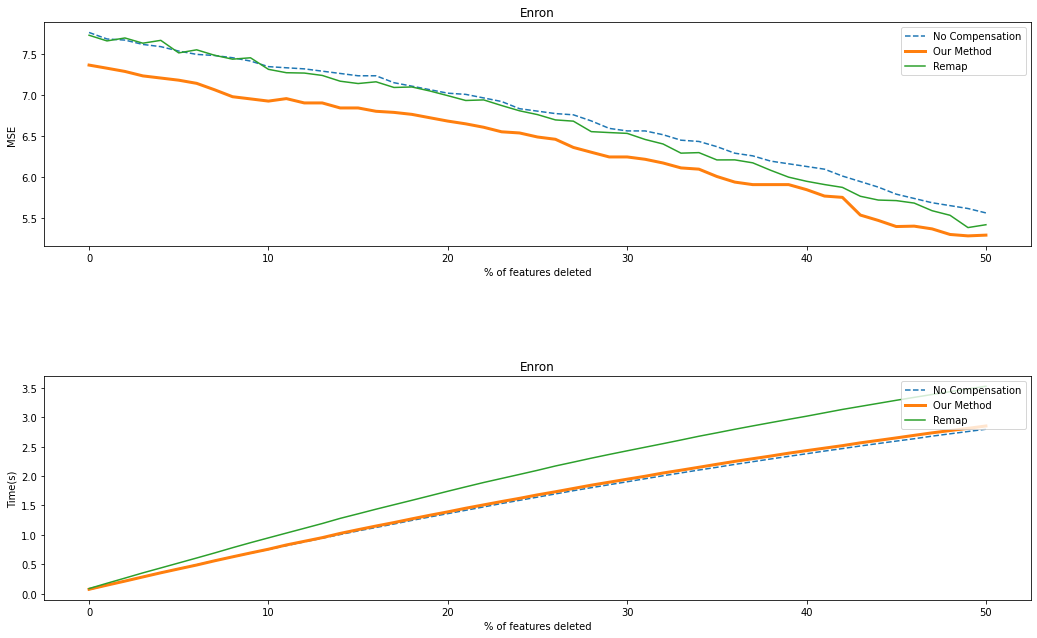

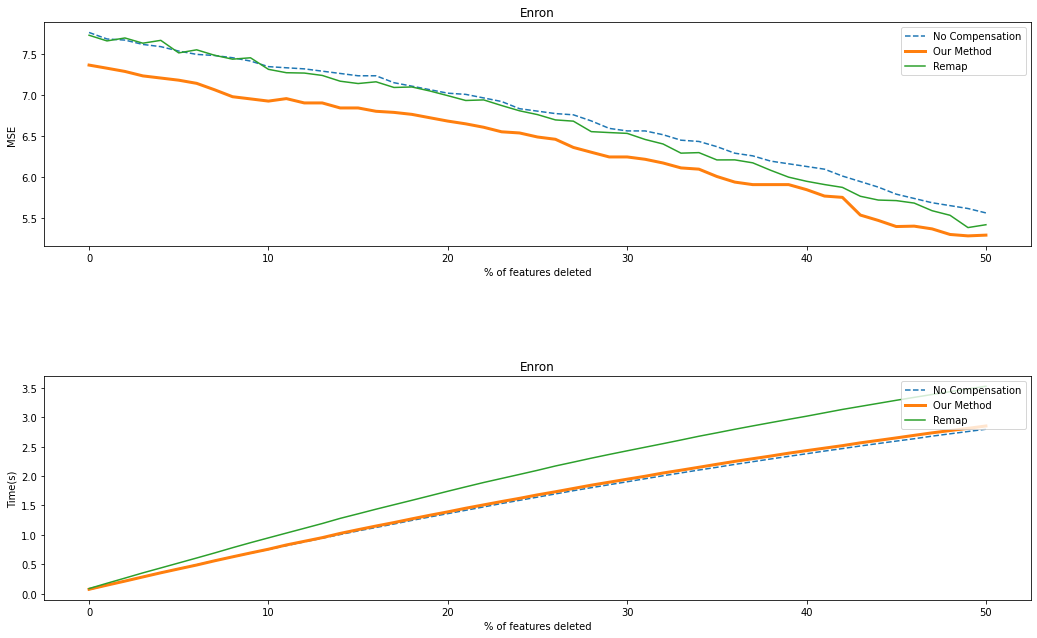

In [160]:
n_pairs = 4
files = {"Enron" : "docword.enron.txt"}

fig, ax = plt.subplots(2, 1)
ax[0].set_title('Enron')
ax[1].set_title('Enron')
ax[0].set(xlabel='% of features deleted', ylabel='MSE')
ax[1].set(xlabel='% of features deleted', ylabel='Time(s)')
it = 0
for x, y in files.items():
    avg_batch_error_a, avg_batch_error_b, avg_batch_error_c, avg_batch_time_a, avg_batch_time_b, avg_batch_time_c = get_all_errors(y, n_pairs, 5, 9)


    print(x, ":", avg_batch_error_a, avg_batch_error_b, avg_batch_error_c)

    # avg_batch_error_a, avg_batch_error_b, avg_batch_error_c, avg_batch_time_a, avg_batch_time_b, avg_batch_time_c = [1,2,4,5,6,8,9,1,4,6], [2,2,4,5,6,8,9,1,4,6], [3,2,4,5,6,8,9,1,4,6], [4,2,4,5,6,8,9,1,4,6], [5,2,4,5,6,8,9,1,4,6], [6,2,4,5,6,8,9,1,4,6]





    ax[0].plot(range(len(avg_batch_error_a)), np.array(avg_batch_error_a)**(0.5), label="No Compensation", linestyle='--')
    ax[0].plot(range(len(avg_batch_error_b)), np.array(avg_batch_error_b)**(0.5), label="Our Method", linewidth=3)
    ax[0].plot(range(len(avg_batch_error_c)), np.array(avg_batch_error_c)**(0.5), label="Remap")
    ax[0].legend(loc='upper right')

    ax[1].plot(range(len(avg_batch_time_a)), avg_batch_time_a, label="No Compensation", linestyle='--')
    ax[1].plot(range(len(avg_batch_time_b)), avg_batch_time_b, label="Our Method", linewidth=3)
    ax[1].plot(range(len(avg_batch_time_c)), avg_batch_time_c, label="Remap")
    ax[1].legend(loc='upper right')
    it+=1
fig.tight_layout(pad=0.5)
fig.set_figheight(10)
fig.set_figwidth(15)

#plt.show()
fig.savefig('sample_0002_All_Datasets_1000_'+'.png', orientation = 'landscape')
fig


Feature deletion without bin shrinking

Experiment conducted on: 1 st pair of datapoints
Experiment conducted on: 2 st pair of datapoints
Enron : [59.62017081605302, 58.61875997074668, 58.21116789749904, 58.004984438370656, 57.59923403420496, 55.920161467654324, 55.31517811223762, 54.6996234195533, 54.6996234195533, 54.09829952612807, 53.48820259175294, 52.68858310136238, 52.267315757936814, 51.24967470827306, 50.43338790675339, 50.02822113763142, 49.61886614330217, 49.21324515933869, 48.80617546947259, 48.199017946575765, 47.99878651429579, 47.79645902731737, 47.19695466367901, 46.5904947858521, 45.77861798449412, 45.17683129534319, 44.58483911290419, 44.17914501715915, 43.77990012721289, 43.17276999443984, 42.76965843576285, 42.76965843576285, 42.163310180119225, 41.758726156320954, 40.89316883621207, 40.09300315578528, 39.890146959801555, 39.29152219967443, 39.29152219967443, 38.69514305628647, 38.087816773434355, 37.48474274370189, 36.68343726762832, 36.282105689040286, 35.28173247484381, 34.02411283432558, 33.2324926211

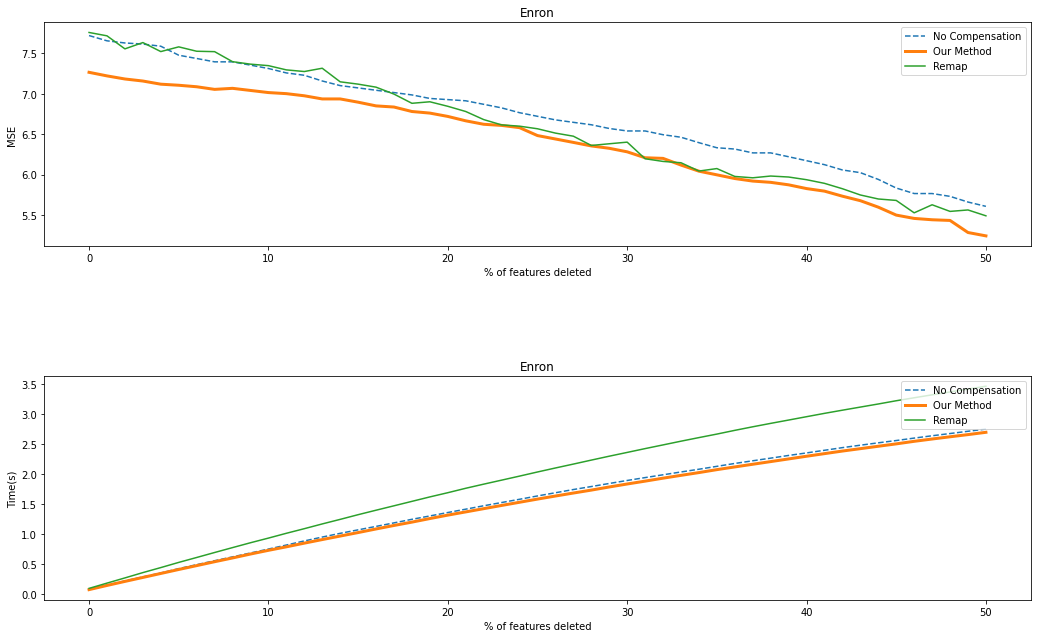

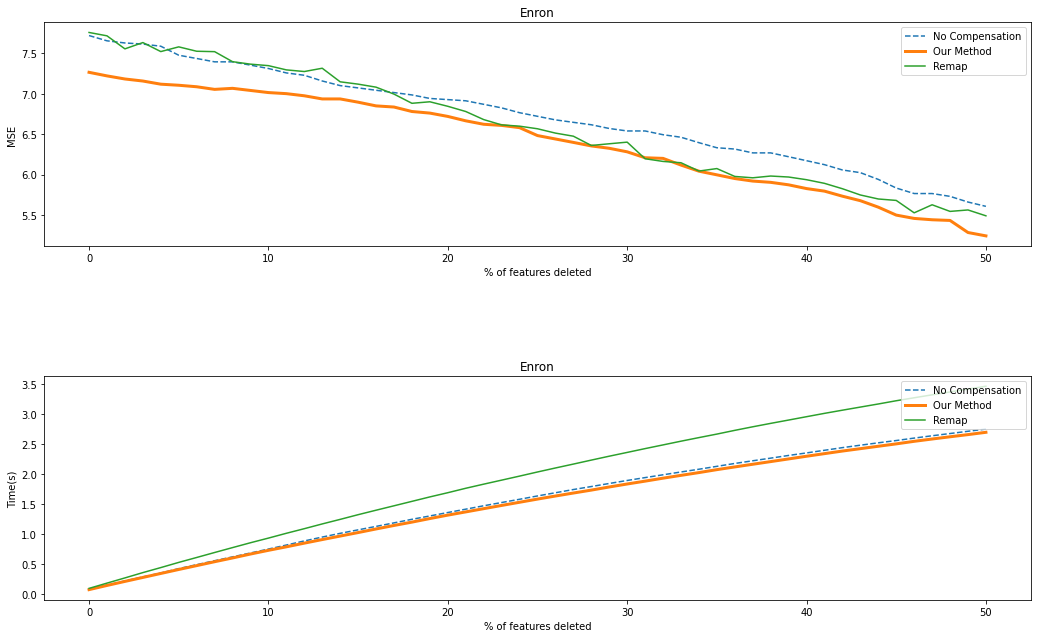

In [161]:
n_pairs = 4
files = {"Enron" : "docword.enron.txt"}

fig, ax = plt.subplots(2, 1)
ax[0].set_title('Enron')
ax[1].set_title('Enron')
ax[0].set(xlabel='% of features deleted', ylabel='MSE')
ax[1].set(xlabel='% of features deleted', ylabel='Time(s)')
it = 0
for x, y in files.items():
    avg_batch_error_a, avg_batch_error_b, avg_batch_error_c, avg_batch_time_a, avg_batch_time_b, avg_batch_time_c = get_all_errors(y, n_pairs, 5, 6)


    print(x, ":", avg_batch_error_a, avg_batch_error_b, avg_batch_error_c)

    # avg_batch_error_a, avg_batch_error_b, avg_batch_error_c, avg_batch_time_a, avg_batch_time_b, avg_batch_time_c = [1,2,4,5,6,8,9,1,4,6], [2,2,4,5,6,8,9,1,4,6], [3,2,4,5,6,8,9,1,4,6], [4,2,4,5,6,8,9,1,4,6], [5,2,4,5,6,8,9,1,4,6], [6,2,4,5,6,8,9,1,4,6]





    ax[0].plot(range(len(avg_batch_error_a)), np.array(avg_batch_error_a)**(0.5), label="No Compensation", linestyle='--')
    ax[0].plot(range(len(avg_batch_error_b)), np.array(avg_batch_error_b)**(0.5), label="Our Method", linewidth=3)
    ax[0].plot(range(len(avg_batch_error_c)), np.array(avg_batch_error_c)**(0.5), label="Remap")
    ax[0].legend(loc='upper right')

    ax[1].plot(range(len(avg_batch_time_a)), avg_batch_time_a, label="No Compensation", linestyle='--')
    ax[1].plot(range(len(avg_batch_time_b)), avg_batch_time_b, label="Our Method", linewidth=3)
    ax[1].plot(range(len(avg_batch_time_c)), avg_batch_time_c, label="Remap")
    ax[1].legend(loc='upper right')
    it+=1
fig.tight_layout(pad=0.5)
fig.set_figheight(10)
fig.set_figwidth(15)

#plt.show()
fig.savefig('sample_0001_All_Datasets_1000_'+'.png', orientation = 'landscape')
fig


Function : get_feature_insertion_results will be used by get_all_errors_new to perform feature insertion experiment.

In [162]:
def get_feature_insertion_results(Input_dimension ,Output_dimension ,default_maps ,array1,array2,mapping_scheme=1,max_value=0):

    batch_error = []
    batch_time = []
    sample_size = Input_dimension/100
    increased_input_dim = int(Input_dimension*2.0)
    demo_operator = operator(input_dim=Input_dimension, output_dim=Output_dimension, mapping_scheme=mapping_scheme)
    ct = 0
    # demo_operator.mapping.bits = default_bits
    # demo_operator.mapping.map = default_maps
    batch_inner_product1 = []
    batch_inner_product2 = []
    while Input_dimension <= increased_input_dim:
        # print("\t", ct)
        ct+=1
        # print ("epoch1:::Input Dimenson::",Input_dimension)
        batch_feature_size = int(sample_size)
        batch_positions = get_adversarial_positions(demo_operator,batch_feature_size)
        feature1 = np.random.normal(0,1,size=batch_feature_size)
        feature2 = np.random.normal(0,1,size=batch_feature_size)



        Input_dimension+=batch_feature_size

        t1 = time.time()
        array1,array2 = demo_operator.batch_insert_feature(batch_positions,array1,array2, feature1, feature2)
        # print("batch feature deletion done....")
        # print("arr1:",array1)
        # print("arr2:",array2)
        inner_product1, inner_product2 = demo_operator.inner_product(array1, array2)
        t2 = time.time()
        error = abs(inner_product1-inner_product2)
        # print ("inners products:",inner_product1,inner_product2)
        # print("error:", error)
        batch_error.append(error)
        batch_inner_product1.append(inner_product1)
        batch_inner_product2.append(inner_product2)
        batch_time.append(t2-t1)
        # print ("Mapping scheme :",mapping_scheme,"::")
        #print (demo_operator.get_feature_count())
		

    return batch_error, batch_time, batch_inner_product1,batch_inner_product2,array1,array2

Function : get_remap_results_new will be used by get_all_errors_new to perform feature insertion experiment.

In [163]:
def get_remap_results_new(Input_dimension, Output_dimension, array1, array2, mapping_scheme):
    batch_error = []
    batch_time = []
    sample_size = Input_dimension/100
    increased_input_dim = int(Input_dimension*2)
    demo_operator = operator(input_dim=Input_dimension, output_dim=Output_dimension, mapping_scheme=mapping_scheme)
    # demo_operator.mapping.bits = default_bits
    # demo_operator.mapping.map = default_maps
    batch_inner_product1 = []
    batch_inner_product2 = []
    while Input_dimension <= increased_input_dim:
        # print ("epoch1:::Input Dimenson::",Input_dimension)
        
        batch_feature_size = int(sample_size)
        batch_positions = get_adversarial_positions(demo_operator,batch_feature_size)
        Input_dimension+=batch_feature_size
        feature1 = np.random.normal(0,1,size=batch_feature_size)
        feature2 = np.random.normal(0,1,size=batch_feature_size)

        t1 = time.time()
        array1,array2 = demo_operator.batch_insert_feature(batch_positions,array1,array2, feature1, feature2)
        # print("batch feature deletion done....")
        # print("arr1:",array1)
        # print("arr2:",array2)
        fresh_operator = operator(input_dim=Input_dimension, output_dim=Output_dimension, mapping_scheme=mapping_scheme)
        inner_product1, inner_product2 = fresh_operator.inner_product(array1, array2)
        t2 = time.time()
        error = abs(inner_product1-inner_product2)
        # print ("inners products:",inner_product1,inner_product2)
        # print("error:", error)
        batch_error.append(error)
        batch_time.append((t2-t1)*2)
        batch_inner_product1.append(inner_product1)
        batch_inner_product2.append(inner_product2)
        # print ("Mapping scheme :",mapping_scheme,"::")
        # print (demo_operator.get_feature_count())
        

    return batch_error, batch_time, batch_inner_product1,batch_inner_product2,array1,array2

Function : get_all_errors_new to perform feature insertion experiment.

In [164]:
def get_all_errors_new(input_file, n_pairs, compensation1, compensation2):
    count = 1
    avg_batch_error_a = []
    avg_batch_error_b = []
    avg_batch_error_c = []
    
    avg_batch_time_a = []
    avg_batch_time_b = []
    avg_batch_time_c = []
    data_array = load_data(input_file,n_pairs)
    print(data_array)
    N = data_array[0].size
    M = 2000

    dataset = input_file.split('.')[1]
    
    while count < n_pairs-1:
        
        mapping = mapper5(N,M)
        # bits = mapping.bits
        maps = mapping.map

        print("Experiment conducted on",count," pair of datapoint")
        
        # print ("* Input Dimension of Dataset:",N)
        # print ("* Output (compressed) Dimension of Dataset:",M)
        alpha = 1

        arr1 = data_array[count-1]
        arr2 = data_array[count]

        # print ("* Selected array (1) from Dataset:",arr1)
        # print ("* Selected array (2) from Dataset:",arr2)

        norm_arr_1 = arr1 #array_normalization(arr1)
        norm_arr_2 = arr2 #array_normalization(arr2)

        # norm_arr_1 = arr1
        # norm_arr_2 = arr2

        # print ("* Normalized array (1):",norm_arr_1)
        # print ("* Normalized array (2):",norm_arr_2)

        batch_error_a, batch_time_a, batch_inner_product1_a,batch_inner_product2_a,_,_ = get_feature_insertion_results(Input_dimension = N,Output_dimension = M,default_maps=maps,array1=norm_arr_1,array2=norm_arr_2,mapping_scheme=5,max_value=alpha)

        # plt.plot(range(len(batch_error)), batch_error, label = "Error Without Compensation")
        # plt.plot(range(len(batch_inner_product1)), batch_inner_product1, label = "IP1 Without Compensation")
        # plt.plot(range(len(batch_inner_product2)), batch_inner_product2, label = "IP2 Without Compensation")

        batch_error_b, batch_time_b,batch_inner_product1_b,batch_inner_product2_b,_,_ = get_feature_insertion_results(Input_dimension = N,Output_dimension = M,default_maps=maps,array1=norm_arr_1,array2=norm_arr_2,mapping_scheme=6,max_value=alpha)

        batch_error_c, batch_time_c, batch_inner_product1_c,batch_inner_product2_c,_,_ = get_remap_results_new(Input_dimension = N,Output_dimension = M,array1=norm_arr_1,array2=norm_arr_2,mapping_scheme=5)
        # batch_error_c,batch_inner_product1_c,batch_inner_product2_c,_,_ = get_feature_deletion_results(Input_dimension = N,Output_dimension = M,default_bits=bits,default_maps=maps,array1=norm_arr_1,array2=norm_arr_2,mapping_scheme=8,max_value=alpha)

        # print(batch_error,batch_inner_product1,batch_inner_product2,array1,array2)

        # plt.plot(range(len(batch_error)), batch_error, label = "Error With Compensation")
        # plt.plot(range(len(batch_inner_product1)), batch_inner_product1, label = "IP1 With Compensation")
        # plt.plot(range(len(batch_inner_product2)), batch_inner_product2, label = "IP2 With Compensation")
        # plt.legend()
        # plt.show()
        if count == 1:
            avg_batch_error_a = batch_error_a
            avg_batch_error_b = batch_error_b
            avg_batch_error_c = batch_error_c

            avg_batch_time_a = batch_time_a
            avg_batch_time_b = batch_time_b
            avg_batch_time_c = batch_time_c

            # avg_inner_product1_a = batch_inner_product1_a
            # avg_inner_product2_a = batch_inner_product2_a
            # avg_inner_product1_b = batch_inner_product1_b
            # avg_inner_product2_b = batch_inner_product2_b
            # avg_inner_product1_c = batch_inner_product1_c
            # avg_inner_product2_c = batch_inner_product2_c

        else :
            for i in range(len(batch_error_a)):
                avg_batch_error_a[i] += batch_error_a[i]
                avg_batch_error_b[i] += batch_error_b[i]
                avg_batch_error_c[i] += batch_error_c[i]

                avg_batch_time_a[i] += batch_time_a[i]
                avg_batch_time_b[i] += batch_time_b[i]
                avg_batch_time_c[i] += batch_time_c[i]

                # avg_inner_product1_a[i] += batch_inner_product1_a[i]
                # avg_inner_product2_a[i] += batch_inner_product2_a[i]
                # avg_inner_product1_b[i] += batch_inner_product1_b[i]
                # avg_inner_product2_b[i] += batch_inner_product2_b[i]
                # avg_inner_product1_c[i] += batch_inner_product1_c[i]
                # avg_inner_product2_c[i] += batch_inner_product2_c[i]

        if count%50 == 0 or count == n_pairs-2:
            np.save('sample0000_testing_'+dataset+'_'+str(count)+'.npy', [ (np.array(avg_batch_error_a)/count, np.array(batch_time_a)/count), (np.array(avg_batch_error_b)/count, np.array(batch_time_b)/count), (np.array(avg_batch_error_c)/count, np.array(batch_time_c)/count) ])

        count += 1

    for i in range(len(avg_batch_error_a)):
        avg_batch_error_a[i] /= n_pairs
        avg_batch_error_b[i] /= n_pairs
        avg_batch_error_c[i] /= n_pairs

        avg_batch_time_a[i] /= n_pairs
        avg_batch_time_b[i] /= n_pairs
        avg_batch_time_c[i] /= n_pairs

        # avg_inner_product1_a[i] /= n_pairs
        # avg_inner_product2_a[i] /= n_pairs
        # avg_inner_product1_b[i] /= n_pairs
        # avg_inner_product2_b[i] /= n_pairs
        # avg_inner_product1_c[i] /= n_pairs
        # avg_inner_product2_c[i] /= n_pairs

    

    avg_batch_time_a=cumulate(avg_batch_time_a)
    avg_batch_time_b=cumulate(avg_batch_time_b)
    avg_batch_time_c=cumulate(avg_batch_time_c)
    return avg_batch_error_a,  avg_batch_error_b, avg_batch_error_c, avg_batch_time_a, avg_batch_time_b, avg_batch_time_c


**Feature Insertion with bin expansion**

[array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0])]
1
2
Enron : [92.69777854641524, 122.49209544351766, 157.00518976859655, 181.74545878195414, 199.4393360457767, 226.15963604586977, 244.34795343822483, 259.39293217046827, 277.21412480185444, 291.39033826424776, 310.85815032331743, 322.32936053709767, 338.7716116089688, 354.9101939235641, 359.0896250141623, 366.66146490222457, 374.7176764049903, 384.1767788578388, 388.3527818307678, 394.87895644807327, 395.1979906763602, 412.1880178510312, 423.11038067495883, 439.77821876133567, 445.55058885615415, 454.9940327443654, 464.38186902552684, 473.8643870975542, 479.6470463698233, 487.8568257177571, 496.8973797748116, 502.853942337986, 522.2549793026535, 521.6842644821138, 525.3904921156698, 530.2762930746485, 537.6355942040611, 549.6536054277638, 551.2012292570765, 558.550677129854, 568.1692616537064, 566.1792850183517, 570.2664964689

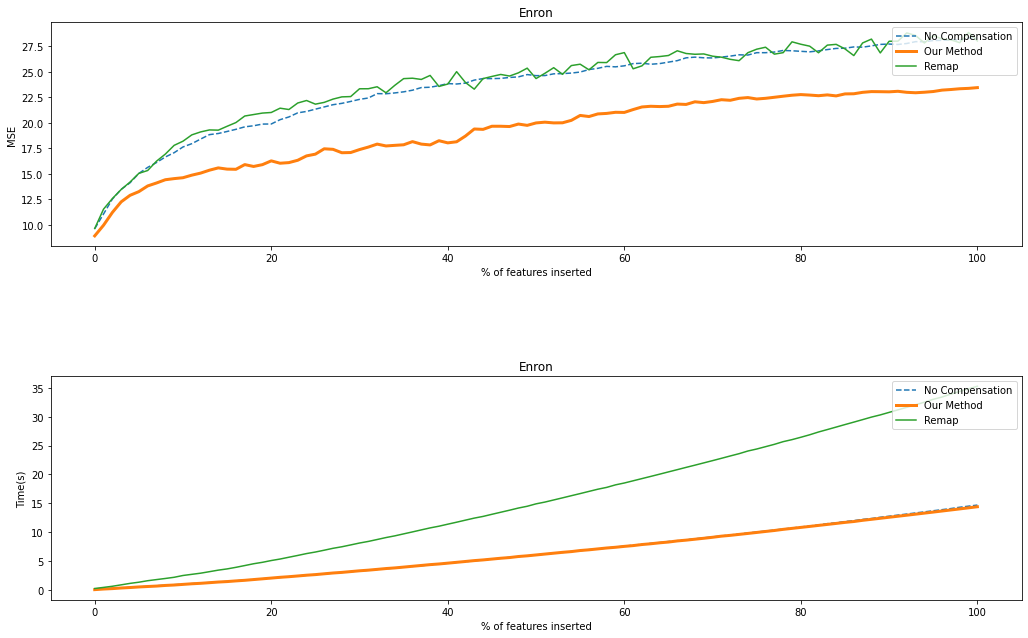

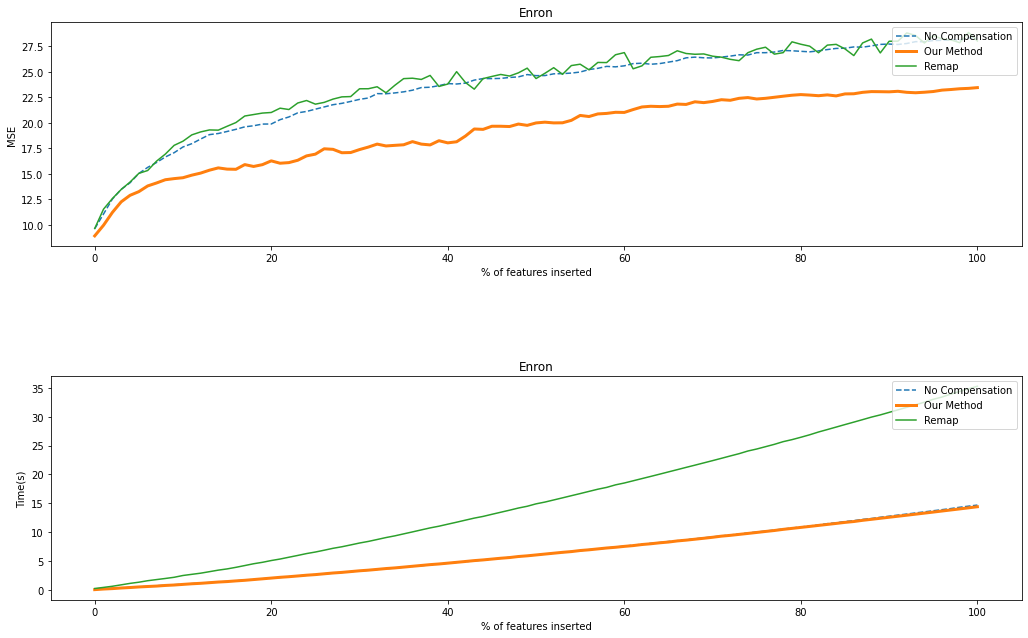

In [165]:
n_pairs = 4
files = {"Enron" : "docword.enron.txt"}

fig, ax = plt.subplots(2, 1)
ax[0].set_title('Enron')
ax[1].set_title('Enron')
ax[0].set(xlabel='% of features inserted', ylabel='MSE')
ax[1].set(xlabel='% of features inserted', ylabel='Time(s)')
it = 0
for x, y in files.items():
    avg_batch_error_a, avg_batch_error_b, avg_batch_error_c, avg_batch_time_a, avg_batch_time_b, avg_batch_time_c = get_all_errors_new(y, n_pairs, 5, 6)


    print(x, ":", avg_batch_error_a, avg_batch_error_b, avg_batch_error_c)

    # avg_batch_error_a, avg_batch_error_b, avg_batch_error_c, avg_batch_time_a, avg_batch_time_b, avg_batch_time_c = [1,2,4,5,6,8,9,1,4,6], [2,2,4,5,6,8,9,1,4,6], [3,2,4,5,6,8,9,1,4,6], [4,2,4,5,6,8,9,1,4,6], [5,2,4,5,6,8,9,1,4,6], [6,2,4,5,6,8,9,1,4,6]





    ax[0].plot(range(len(avg_batch_error_a)), np.array(avg_batch_error_a)**(0.5), label="No Compensation", linestyle='--')
    ax[0].plot(range(len(avg_batch_error_b)), np.array(avg_batch_error_b)**(0.5), label="Our Method", linewidth=3)
    ax[0].plot(range(len(avg_batch_error_c)), np.array(avg_batch_error_c)**(0.5), label="Remap")
    ax[0].legend(loc='upper right')

    ax[1].plot(range(len(avg_batch_time_a)), avg_batch_time_a, label="No Compensation", linestyle='--')
    ax[1].plot(range(len(avg_batch_time_b)), avg_batch_time_b, label="Our Method", linewidth=3)
    ax[1].plot(range(len(avg_batch_time_c)), avg_batch_time_c, label="Remap")
    ax[1].legend(loc='upper right')
    it+=1
fig.tight_layout(pad=0.5)
fig.set_figheight(10)
fig.set_figwidth(15)

#plt.show()
fig.savefig('sample_0000_All_Datasets_1000_'+'.png', orientation = 'landscape')
fig